# Current Population Survey KNearest Classification

Predict whether an individuals family income is $50,000 or greater. Then predict whether an individual is married.

In [1]:
import numpy as np
import pandas as pd
import sklearn as skl
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
%matplotlib inline

In [2]:
# Import dataset
data = pd.read_csv("../datasets/CPS2016_NEW.csv", index_col=None)

# We are going to use the entire dataset for this model
# to test on a smaller sample uncomment below
# data = data.sample(n=1000)

# Apply 80/20 training/testing split
# Results may vary each time the data is split

data_train, data_test = train_test_split(data, test_size=0.2)
data.head()

,age,weekly_hrs,educ,fam_income,num_in_house,num_child,sex,marital,race,state,citizen,worker_class,industry,occupation,faminc_50,ismarried
0,17,60,34,7,11,0,1,6,1,36,1,6,1,18,0,0
1,64,20,35,16,2,0,1,1,1,18,1,6,6,21,1,1
2,55,40,36,2,2,0,1,1,1,23,1,6,47,20,0,1
3,58,18,36,9,2,0,1,4,1,37,1,6,22,14,0,0
4,17,15,36,15,5,0,1,6,1,27,1,6,1,18,1,0


In [3]:
# Function to plot binary categories
def getColor(arr):
    colorList = [];
    for x in arr:
        color = "magenta" if x == 1 else "green"
        colorList.append(color)
    return colorList;     

# Function to display scores at each increasing k-neighbors
# Using 5-fold cross validation
def getKNearestCVScores(X, Y):
    nb = np.arange(1,25)
    scorelist = []
    for d in nb:
        T = neighbors.KNeighborsClassifier(n_neighbors=d)
        scores = cross_val_score(T, X, Y, 
                                 cv=KFold(shuffle=True, n_splits=5), n_jobs=-1)
        scorelist.append(scores.mean())
        print(f"{d}:\t{scores.mean()}")
    
    print("max score: ", max(scorelist))
    print("neighbors =", scorelist.index(max(scorelist)) + 1)
    
# Function to display scores at each increasing k-neighbors
# using split data, returns graph
def getKNearestScores(X, Y, xTest, yTest):
    depth = np.arange(1,25)
    score_train = []
    score_test = []
    print("Training", "   ", "Testing")
    for d in depth:
        T = neighbors.KNeighborsClassifier(n_neighbors=d)
        T.fit(X,Y)
        s_train = T.score(X, Y)
        s_test = T.score(xTest, yTest)
        print(f"{d}:\t{s_train}:\t{s_test}")
        score_train.append(s_train)
        score_test.append(s_test)
    
    fig,ax = plt.subplots(1, figsize=(6,6), dpi=100)
    ax.plot(depth, score_train, label="training data")
    ax.plot(depth, score_test, label="testing data")
    ax.set_xlabel("neighbors")
    ax.set_ylabel("R2 score")
    fig.legend()
    plt.show() 
    
# function to plot KNearest neighbors prediction with 2 input variables
def plotKNearestTwoVars(x, y, target, nb):
    colorList = getColor(data_train[target])
    T2 = neighbors.KNeighborsClassifier(n_neighbors=nb)
    T2.fit(data_train[[x,y]],data_train[target])

    x_min, x_max = 10, 90
    y_min, y_max = 30, 47
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    test = pd.DataFrame({'x1': xx.ravel(), 'x2': yy.ravel()})

    # Evaluate model
    colorPredict = getColor(T2.predict(test[['x1','x2']])) 

    fig,ax = plt.subplots(figsize=(10,10), dpi=100)
    ax.scatter(test['x1'], test['x2'], color=colorPredict, alpha=0.05)
    ax.scatter(data_train[x], data_train[y],  color=colorList, s=20, alpha=.2)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title("neighbors= " + str(nb))
    plt.show(fig)   

# Predict if Family Income >50,000
First, lets try using KNearest Classification with only two input variables, 'age' and 'education' to predict if the family income is less than $50,000.

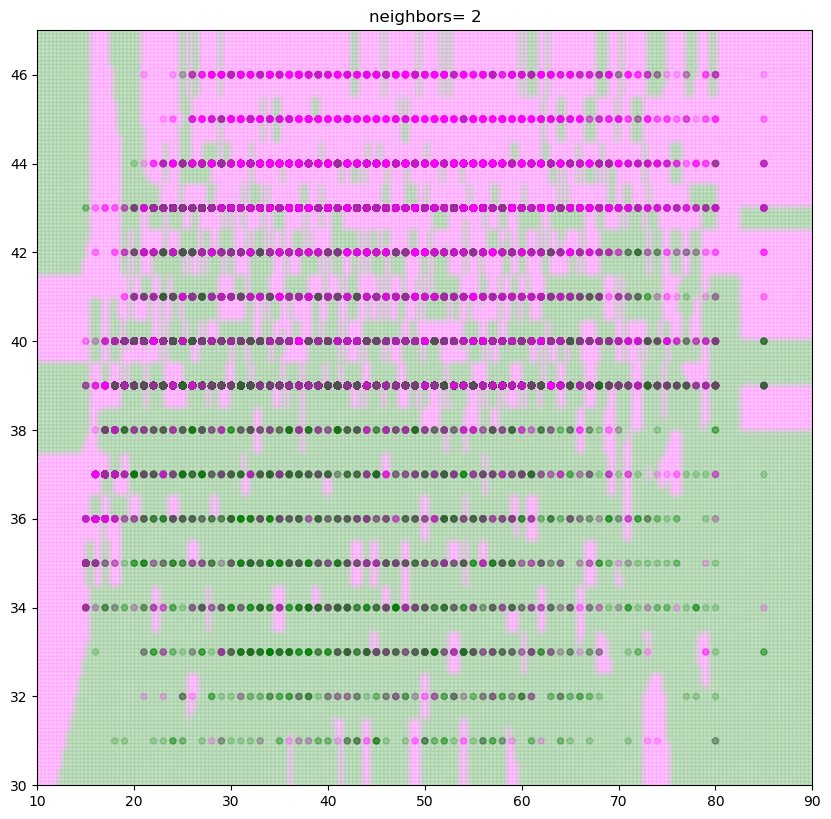

In [4]:
plotKNearestTwoVars('age', 'educ', 'faminc_50', 2)       

# Score the model

We are going to score the model on a range of 1-24 nearest neighbors, first with split data then using using cross-validation.

Training     Testing
1:	0.627460295914212:	0.6197629173830422
2:	0.579476041808063:	0.5753325490905801
3:	0.6577982896701506:	0.6394896389467016
4:	0.6354011130718067:	0.6175911682200705
5:	0.6740871453780372:	0.6531535607637318
6:	0.6597212795801095:	0.6417518776581305
7:	0.6830912628387856:	0.6664555243869333
8:	0.6667119134880775:	0.6569541217989322
9:	0.685444097552147:	0.672789792778934
10:	0.6717569340753812:	0.6640123065785902
11:	0.6854667209628523:	0.6755949687811058
12:	0.6808741685896565:	0.6667269930323048
13:	0.6859418125876657:	0.6757759478780201
14:	0.6792000361974572:	0.6681748258076192
15:	0.6833627437672504:	0.6743281151027056
16:	0.6835663544635989:	0.669803637679848
17:	0.6899687796932266:	0.6781286761379061
18:	0.6892900773720646:	0.6761379060718486
19:	0.6920727568888285:	0.6821102162700208
20:	0.6899687796932266:	0.6770428015564203
21:	0.6910320799963803:	0.6794860193647634
22:	0.6885435048187865:	0.6771332911048774
23:	0.6920275100674178:	0.6822911953669352
24:	

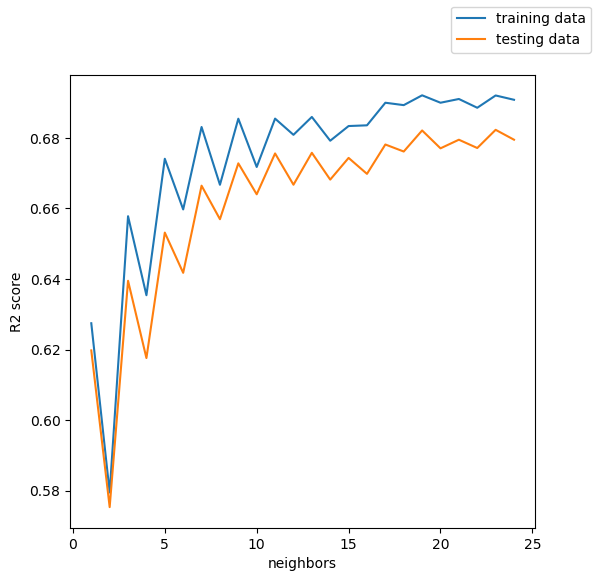

In [5]:
# Score using two input variables
getKNearestScores(data_train[['age','educ']], data_train['faminc_50'],
                  data_test[['age','educ']], data_test['faminc_50'])

In [6]:
# Score using two input variables with cross validation
getKNearestCVScores(data[['age','educ']], data['faminc_50'])

1:	0.6165815652726498
2:	0.5536353893568732
3:	0.631639928574675
4:	0.6046912451566595
5:	0.6413585453866505
6:	0.6359834612948359
7:	0.6600364922647814
8:	0.6460825141845439
9:	0.6624798116179572
10:	0.6544622558266466
11:	0.6662444421605955
12:	0.654950917404334
13:	0.6652855117224911
14:	0.6659548133683773
15:	0.6700088466840903
16:	0.6668054183995142
17:	0.6689589812105209
18:	0.6674206392329107
19:	0.6766509629766722
20:	0.6722169014003769
21:	0.6724521496590674
22:	0.6700813857266454
23:	0.6763977920550176
24:	0.6724522528417198
max score:  0.6766509629766722
neighbors = 19


The model score peaked at around .6789 accuracy where n=19 neighbors.

We are going to add the rest of the numerical variables as an input (besides fam_income, because this is a numerical representation of family income) to predict if the family income is over $50,000.

Training     Testing
1:	0.8088548029500927:	0.6478146774047597
2:	0.724446857608253:	0.601845986788526
3:	0.7719560200895887:	0.6787621029771062
4:	0.7420026243156418:	0.6570446113473893
5:	0.7605764445047736:	0.6925165143425934
6:	0.7512555992941495:	0.6821102162700208
7:	0.7573865435953124:	0.7015654691883088
8:	0.7505316501515769:	0.6950502216993937
9:	0.752929731686349:	0.7063614152565378
10:	0.7482919324917424:	0.7029228124151661
11:	0.7522284059544817:	0.7113383404216813
12:	0.7488575177593774:	0.7083521853225953
13:	0.7493326093841908:	0.7133291104877386
14:	0.7477037238134021:	0.7114288299701385
15:	0.746617800099543:	0.7163152655868247
16:	0.7447853038324058:	0.7144149850692245
17:	0.7436767567078413:	0.7162247760383675
18:	0.744061354689833:	0.7133291104877386
19:	0.7429301841545631:	0.7154103701022532
20:	0.7413917922265961:	0.715862817844539
21:	0.7398081534772182:	0.7167677133291105
22:	0.740645219673318:	0.7175821192652249
23:	0.7402832451020316:	0.7186679938467107
24:	0.

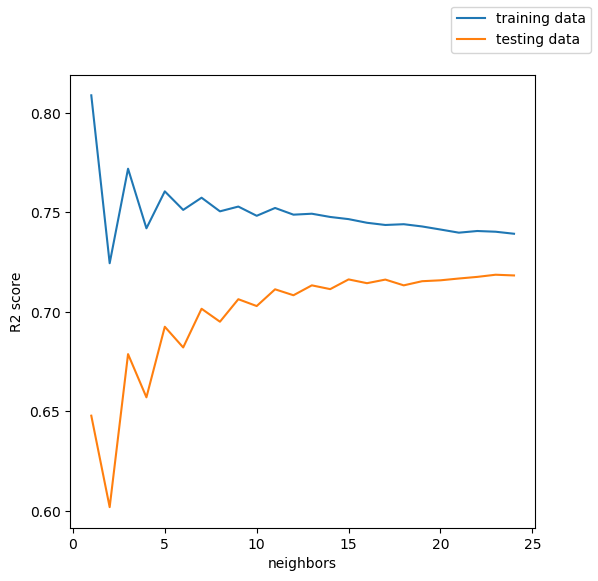

In [7]:
# Score with all numerical variables 
getKNearestScores(data_train[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs']], data_train['faminc_50'],
                  data_test[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs']], data_test['faminc_50'])

In [8]:
# Score with all numerical variables w/ cross validation
getKNearestCVScores(data[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs']], data['faminc_50'])

1:	0.6424809024059983
2:	0.6017953928945641
3:	0.6779361029140502
4:	0.6601270522394934
5:	0.6934826790311149
6:	0.6836913479298572
7:	0.7010479443108484
8:	0.6949308934184617
9:	0.7064414047417343
10:	0.7011203359496141
11:	0.710911583522058
12:	0.7061336452834268
13:	0.7116717907226511
14:	0.7085045123985012
15:	0.7133188364436215
16:	0.7126851901365573
17:	0.7153999666703654
18:	0.7154906101738915
19:	0.7148933775162544
20:	0.715979365107312
21:	0.7142237401172925
22:	0.716250825563584
23:	0.7171739483456177
24:	0.7147486335464001
max score:  0.7171739483456177
neighbors = 23


Using the numerical variables 'age','num_in_house', 'num_child', 'educ' and 'weekly_hrs', the score for "family income greater than $50,000" peaked at .7178 where n=23 neighbors.

Decision Tree Classification is slightly more effective than KNearest Neighbors when predicting if the family income is greater than 50,000. 
- (K Nearest Score) .7178 < (Decision Tree Score) .7276

# Predict if Individual is Married

Lets use all of the numerical variables to predict whether an individual is married

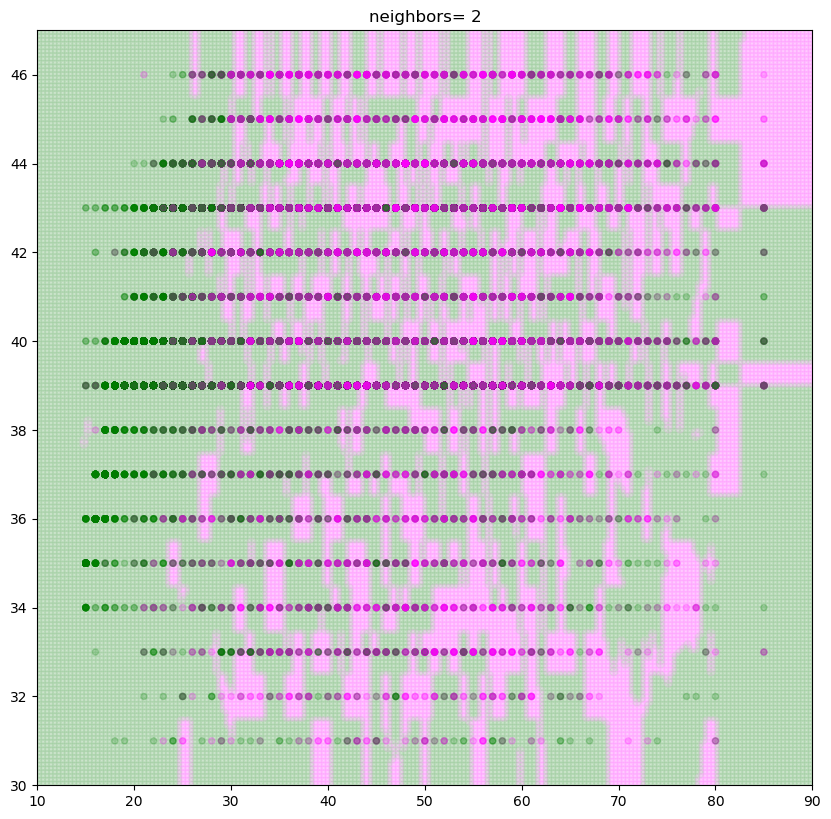

In [9]:
plotKNearestTwoVars('age', 'educ', 'ismarried', 2)  

# Score the model

We are going to score the model on a range of 1-24 nearest neighbors, first with split data then using using cross-validation.

Training     Testing
1:	0.6187050359712231:	0.6075468283413266
2:	0.5652459164743677:	0.5604017735951498
3:	0.6463508438532193:	0.6319790064247579
4:	0.6251979548436722:	0.6162338249932133
5:	0.665377132256459:	0.6540584562483033
6:	0.652187683815212:	0.6413899194643019
7:	0.667254875345007:	0.6557777576689893
8:	0.6568028595991131:	0.6457334177902452
9:	0.678453463644179:	0.665098181160076
10:	0.6637482466856703:	0.6518867070853317
11:	0.6777747613230171:	0.6624739842548185
12:	0.6683634224695715:	0.6548728621844176
13:	0.6849011356952174:	0.670437064519048
14:	0.6792452830188679:	0.6664555243869333
15:	0.6899687796932266:	0.6755044792326487
16:	0.6857834487127279:	0.6728802823273912
17:	0.6898330392289942:	0.6772237806533346
18:	0.6833401203565449:	0.6702560854221338
19:	0.6892448305506538:	0.6755949687811058
20:	0.687095606533641:	0.6730612614243054
21:	0.6905569883715669:	0.6762283956203059
22:	0.6886566218723135:	0.6750520314903629
23:	0.6910547034070856:	0.6790335716224776
24:	0.

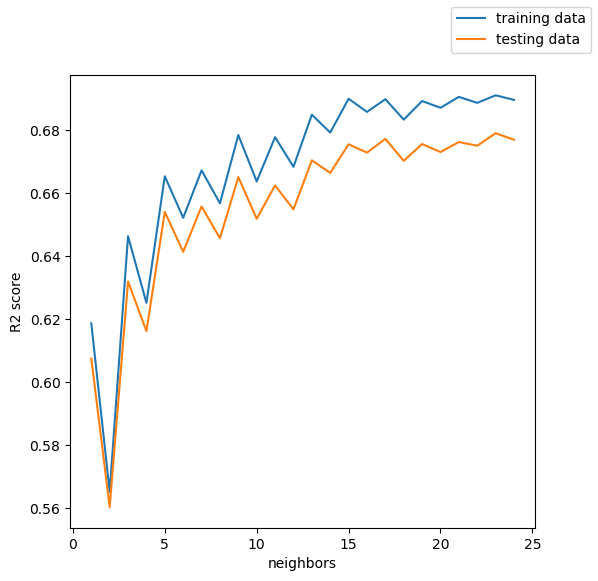

In [10]:
# Score using two input variables
getKNearestScores(data_train[['age','educ']], data_train['ismarried'],
                  data_test[['age','educ']], data_test['ismarried'])

In [11]:
# Score using 2 input variables with cross validation
getKNearestCVScores(data[['age','educ']], data['ismarried']) 

1:	0.5924929772330753
2:	0.5513908653052835
3:	0.6052164923548615
4:	0.5862848406257946
5:	0.6101026135101305
6:	0.5940853820071565
7:	0.6240204661972403
8:	0.6039124896459074
9:	0.6140487144956477
10:	0.6070979412194634
11:	0.6143377012624724
12:	0.6234592672148176
13:	0.6201473710329444
14:	0.6204369293989078
15:	0.6219211725480096
16:	0.6164008629672957
17:	0.6312597856667013
18:	0.6186090290553341
19:	0.6210522485014971
20:	0.6243642167474452
21:	0.6295581497712579
22:	0.6341193110838232
23:	0.6347347579363634
24:	0.6277484456065686
max score:  0.6347347579363634
neighbors = 23


We are going to add the rest of the numerical variables as an input to predict whether the individual is married.

Training     Testing
1:	0.9352744219718565:	0.7336892588905981
2:	0.8526084792543324:	0.709980997194824
3:	0.861454232840143:	0.7547733236811148
4:	0.8400072394914258:	0.748348565740657
5:	0.83939640740238:	0.7659035381413447
6:	0.8303696665309263:	0.7621029771061443
7:	0.8277453508891001:	0.7709709528549452
8:	0.8226550834803855:	0.7706994842095738
9:	0.8188995973032894:	0.7697945887250023
10:	0.8175195692502601:	0.7704280155642024
11:	0.814782136554907:	0.773233191566374
12:	0.8124745486629564:	0.7746810243416885
13:	0.8100312203067734:	0.776128857117003
14:	0.8088548029500927:	0.7750429825355172
15:	0.8074521514863581:	0.7764003257623745
16:	0.8073616578435365:	0.7765813048592888
17:	0.8042396271661916:	0.7746810243416885
18:	0.8042622505768969:	0.7725092751787168
19:	0.8025881181846976:	0.7744095556963171
20:	0.8009818560246142:	0.7759478780200887
21:	0.8003031537034523:	0.773233191566374
22:	0.8005746346319171:	0.7746810243416885
23:	0.7981539296864395:	0.7726902542756312
24:	0.79

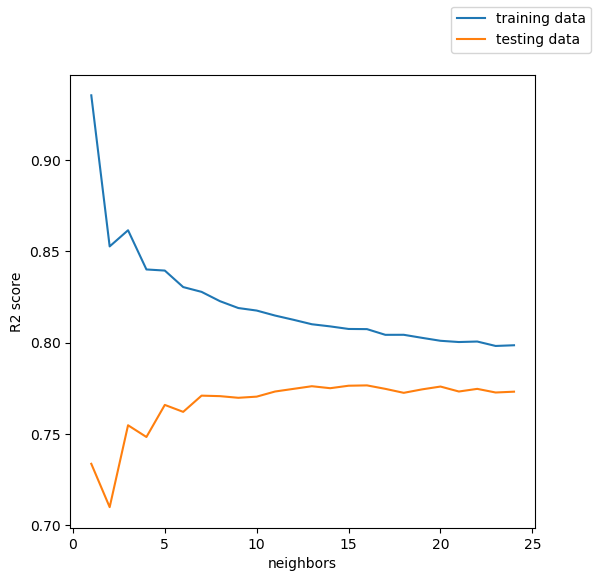

In [12]:
# Score with all numerical variables
getKNearestScores(data_train[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs','fam_income']], data_train['ismarried'],
                  data_test[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs','fam_income']], data_test['ismarried'])

In [13]:
# Score with all numerical variables using Cross Validation
getKNearestCVScores(data[['age','num_in_house', 'num_child', 
                'educ','weekly_hrs', 'fam_income']], data['ismarried'])

1:	0.7312183095160202
2:	0.7129749712460247
3:	0.7589634139700303
4:	0.7485566507566114
5:	0.7671076174593237
6:	0.7635604025925051
7:	0.7738041863495083
8:	0.7703654361043472
9:	0.7728991844066445
10:	0.7730258845148634
11:	0.7759579096668634
12:	0.7749986893346398
13:	0.7759579473367207
14:	0.7757767946308989
15:	0.7774058505382899
16:	0.7772428088447187
17:	0.7780572884827277
18:	0.7786905908476168
19:	0.7777858313020956
20:	0.7784193023624324
21:	0.777224838684978
22:	0.7783288177274348
23:	0.7792155268600414
24:	0.7776048440160818
max score:  0.7792155268600414
neighbors = 23


Using the numerical variables 'age','num_in_house', 'num_child', 'fam_income', 'educ' and 'weekly_hrs', the score for "Is this individual married" peaked at .7795where n=20 neighbors.

Decision Tree Classification is more effective than KNearest Neighbors when predicting if an individual is married. 
- (KNearest Score) .7795 < (Decision Tree Score) .8310